In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [5]:
df_train = pd.read_csv(r"C:\Users\mohni\Downloads\cs2806-machine-learning-techniques-lab-cyber-2\Cyber2_train.csv")
df_test = pd.read_csv(r"C:\Users\mohni\Downloads\cs2806-machine-learning-techniques-lab-cyber-2\Cyber2_test.csv")
df_val = pd.read_csv(r"C:\Users\mohni\Downloads\cs2806-machine-learning-techniques-lab-cyber-2\Cyber2_val.csv")

In [6]:
df_train.head()

,url,category,label,ID
0,blackpast.org/?q=african-american-history-bibl...,good,1,196598
1,co8bo23vsd.mymazisocimowsed.com/nb9zatf4tk\nww...,bad,0,389728
2,lkis.or.id/845yfgh?riuoiuem=qwhxpkwlmho,bad,0,414140
3,51mct.com/js?ref=http://qszrysyus.battle.net/d3,bad,0,28193
4,beauty-plus.co.uk/tmp/https:/atendimento/chama...,bad,0,24091


In [7]:
df_train.describe()

,label,ID
count,269096.000000,269096.000000
mean,0.820098,210422.214797
std,0.384107,121406.806381
min,0.000000,1.000000
25%,1.000000,105227.750000
50%,1.000000,210416.000000
75%,1.000000,315648.500000
max,1.000000,420464.000000


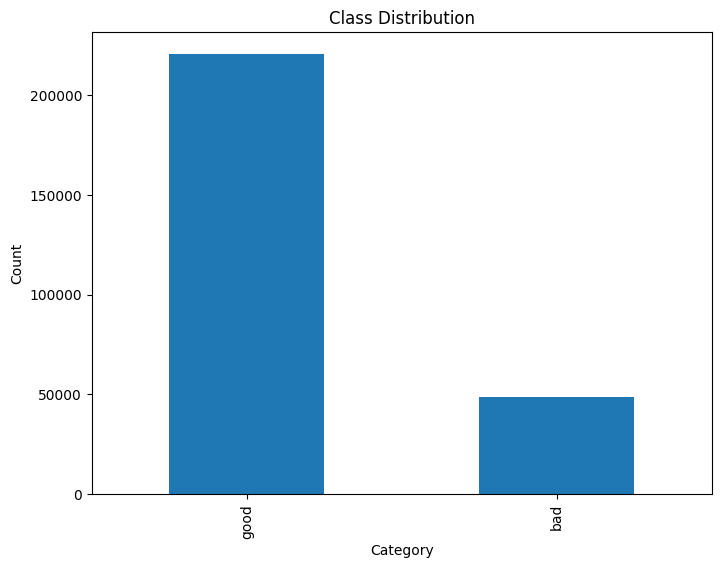

In [8]:
plt.figure(figsize=(8, 6))
df_train['category'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [9]:
from urllib.parse import urlparse

# For df_train
df_train['url_length'] = df_train['url'].apply(lambda i: len(str(i)))

# For df_test
df_test['url_length'] = df_test['url'].apply(lambda i: len(str(i)))

# For df_val
df_val['url_length'] = df_val['url'].apply(lambda i: len(str(i)))


In [10]:
from urllib.parse import urlparse

# For df_train
df_train['path_length'] = df_train['url'].apply(lambda i: len(urlparse(i).path))

# For df_test
df_test['path_length'] = df_test['url'].apply(lambda i: len(urlparse(i).path))

# For df_val
df_val['path_length'] = df_val['url'].apply(lambda i: len(urlparse(i).path))


In [12]:
from urllib.parse import urlparse

# First Directory Length function
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

# For df_train
df_train['fd_length'] = df_train['url'].apply(lambda i: fd_length(i))

# For df_test
df_test['fd_length'] = df_test['url'].apply(lambda i: fd_length(i))

# For df_val
df_val['fd_length'] = df_val['url'].apply(lambda i: fd_length(i))


In [13]:
# For df_train
df_train['count-'] = df_train['url'].apply(lambda i: i.count('-'))
df_train['count?'] = df_train['url'].apply(lambda i: i.count('?'))
df_train['count%'] = df_train['url'].apply(lambda i: i.count('%'))
df_train['count.'] = df_train['url'].apply(lambda i: i.count('.'))
df_train['count='] = df_train['url'].apply(lambda i: i.count('='))
df_train['count-http'] = df_train['url'].apply(lambda i : i.count('http'))
df_train['count-https'] = df_train['url'].apply(lambda i : i.count('https'))
df_train['count-www'] = df_train['url'].apply(lambda i: i.count('www'))

# For df_test
df_test['count-'] = df_test['url'].apply(lambda i: i.count('-'))
df_test['count?'] = df_test['url'].apply(lambda i: i.count('?'))
df_test['count%'] = df_test['url'].apply(lambda i: i.count('%'))
df_test['count.'] = df_test['url'].apply(lambda i: i.count('.'))
df_test['count='] = df_test['url'].apply(lambda i: i.count('='))
df_test['count-http'] = df_test['url'].apply(lambda i : i.count('http'))
df_test['count-https'] = df_test['url'].apply(lambda i : i.count('https'))
df_test['count-www'] = df_test['url'].apply(lambda i: i.count('www'))

# For df_val
df_val['count-'] = df_val['url'].apply(lambda i: i.count('-'))
df_val['count?'] = df_val['url'].apply(lambda i: i.count('?'))
df_val['count%'] = df_val['url'].apply(lambda i: i.count('%'))
df_val['count.'] = df_val['url'].apply(lambda i: i.count('.'))
df_val['count='] = df_val['url'].apply(lambda i: i.count('='))
df_val['count-http'] = df_val['url'].apply(lambda i : i.count('http'))
df_val['count-https'] = df_val['url'].apply(lambda i : i.count('https'))
df_val['count-www'] = df_val['url'].apply(lambda i: i.count('www'))


In [14]:
# Define the digit_count function
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits

# For df_train
df_train['count-digits'] = df_train['url'].apply(lambda i: digit_count(i))

# For df_test
df_test['count-digits'] = df_test['url'].apply(lambda i: digit_count(i))

# For df_val
df_val['count-digits'] = df_val['url'].apply(lambda i: digit_count(i))


In [15]:
# Define the letter_count function
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters

# For df_train
df_train['count-letters'] = df_train['url'].apply(lambda i: letter_count(i))

# For df_test
df_test['count-letters'] = df_test['url'].apply(lambda i: letter_count(i))

# For df_val
df_val['count-letters'] = df_val['url'].apply(lambda i: letter_count(i))


In [16]:
from urllib.parse import urlparse

# Define the no_of_dir function
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

# For df_train
df_train['count_dir'] = df_train['url'].apply(lambda i: no_of_dir(i))

# For df_test
df_test['count_dir'] = df_test['url'].apply(lambda i: no_of_dir(i))

# For df_val
df_val['count_dir'] = df_val['url'].apply(lambda i: no_of_dir(i))


In [17]:
df_train.head(50)

,url,category,label,ID,url_length,path_length,fd_length,count-,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,blackpast.org/?q=african-american-history-bibl...,good,1,196598,54,14,0,3,1,0,1,1,0,0,0,0,47,1
1,co8bo23vsd.mymazisocimowsed.com/nb9zatf4tk\nww...,bad,0,389728,100,72,29,0,1,0,5,2,0,0,1,21,67,2
2,lkis.or.id/845yfgh?riuoiuem=qwhxpkwlmho,bad,0,414140,39,18,7,0,1,0,2,1,0,0,0,3,31,1
3,51mct.com/js?ref=http://qszrysyus.battle.net/d3,bad,0,28193,47,12,2,0,1,0,3,1,1,0,0,3,34,1
4,beauty-plus.co.uk/tmp/https:/atendimento/chama...,bad,0,24091,52,52,3,1,0,0,3,0,1,1,0,0,43,4
5,game6media.com/8g74crec,bad,0,409326,23,23,8,0,0,0,1,0,0,0,0,4,17,1
6,rodgersgen.wordpress.com/2010/04/09/charles-s-...,good,1,139706,66,66,4,4,0,0,2,0,0,0,0,8,47,5
7,perfectpeople.net/celebrity-star/3691/ami-dole...,good,1,317180,52,52,14,2,0,0,2,0,0,0,0,4,41,3
8,en.wikipedia.org/wiki/Canadian_Auto_Workers,good,1,76233,43,43,4,0,0,0,2,0,0,0,0,0,37,2
9,abellpestcontrol.com/pests/pharaoh-ant,good,1,170740,38,38,5,1,0,0,1,0,0,0,0,0,34,2


In [18]:
#Independent Variables
X_train = df_train[[
       'path_length', 'fd_length', 'count-',  'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]

#Dependent Variable
y_train = df_train['label']

In [19]:
X_test = df_train[[
       'path_length', 'fd_length', 'count-',  'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]

#Dependent Variable
y_test = df_train['label']

In [20]:
X_val = df_val[[
       'path_length', 'fd_length', 'count-',  'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score



In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"Classification Report for {name}:")
    print(accuracy_score(y_test, y_pred))

C:\Users\mohni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
0.8415769836786872
Classification Report for Decision Tree:
0.9557704313702173
Classification Report for Random Forest:
0.9557667152243066
Classification Report for k-Nearest Neighbors:
0.9187910634123139
Classification Report for Naive Bayes:
0.834702113743794


In [22]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score
    print(f"F1 Score for {name}: {f1:.4f}")

C:\Users\mohni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score for Logistic Regression: 0.9109
F1 Score for Decision Tree: 0.9732
F1 Score for Random Forest: 0.9733
F1 Score for k-Nearest Neighbors: 0.9513
F1 Score for Naive Bayes: 0.9074


In [25]:
final_model = DecisionTreeClassifier()

# Train SVR model
final_model.fit(X_train, y_train)

# Predict target variable for validation data
y_val = final_model.predict(X_val)

# Add predicted target variable to df_val DataFrame
df_val['label'] = y_val

In [ ]:

df_val.rename(columns={'label': 'Predictions'}, inplace=True)


In [23]:
df_val = df_val.drop(['url','url_length','path_length','fd_length','count-','count?','count%','count.','count=','count-http','count-https','count-www','count-digits','count-letters','count_dir'],axis=1)


In [26]:
df_val

,ID,label
0,93864,1
1,192687,1
2,106530,1
3,263109,1
4,132895,1
...,...,...
67270,275623,1
67271,104424,1
67272,325029,1
67273,66569,1


In [ ]:
df_val.to_csv('submission.csv', index=False)
